# Analysis of Energy Demand

The assignment will focus on data visualisation using pandas library.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

### Importing Libraries
Run the cell below first, to import `pandas` and `matplotlib` `pyplot`. The `matplotlib_axes_logger.setLevel('ERROR')` code prevents some unnecessary warnings from showing.

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### About the Datasets

In the following section, you will be analysing a datasets from the UK government detailing energy consumption across various sectors of industry. 

The datasets include information about:

- Sector - sectors of industry         
- Sub-Sector - a sector that is part of a larger sector       
- Electricity - energy consumption measured in kilowatt hour (kWh)     
- Natural Gas - energy consumption measured in kilowatt hour (kWh)     
- Oil - energy consumption measured in kilowatt hour (kWh)              
- District Heating - is a system for distributing heat generated in a centralised location through a system of insulated pipes, measured in kilowatt hour (kWh)
- Other - other energy sources measured in kilowatt hour (kWh) 

### Data Collection

We have written some code below to do some initial collation and cleaning of the datasets we'll be working with - see if you can follow along and understand what each line is doing.

Run the following cell to import and concatenate the datasets, assigning the result to DataFrame `data`:

In [2]:
df1 = pd.read_csv('heating_2018.csv')
df2 = pd.read_csv('hot_water_2018.csv')
df3 = pd.read_csv('catering_2018.csv')
data = pd.concat([df1, df2, df3], keys=['Heating', 'Hot Water', 'Catering']).reset_index(level=[0])

Running `data.head()`, `data.sample()` and  `data.info()` will show us how the DataFrame is structured:

In [3]:
data.head()

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
0,Heating,"Arts, leisure and community",Clubs & community centres,14,139,60,8.0,NaN
1,Heating,"Arts, leisure and community",Leisure Centres,5,159,7,18.0,NaN
2,Heating,"Arts, leisure and community",Museums,2,12,3,0.0,NaN
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13.0,NaN
4,Heating,"Arts, leisure and community",Theatres,1,35,2,0.0,NaN


In [4]:
data.sample(5)

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
30,Catering,Retail,Showrooms,2,1,1,NaN,NaN
6,Heating,Education,State Primary schools,0,437,134,0.0,NaN
16,Hot Water,Health,Nursing Homes,1,4,2,0.0,0.0
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13.0,NaN
26,Hot Water,Retail,Hairdressers,8,6,9,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 35
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_0           108 non-null    object 
 1   Sector            108 non-null    object 
 2   Sub-Sector        108 non-null    object 
 3   Electricity       108 non-null    int64  
 4   Natural Gas       108 non-null    int64  
 5   Oil               108 non-null    int64  
 6   District Heating  72 non-null     float64
 7   Other             36 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.6+ KB


### Data Processing

**Q1.** First of all, let's tidy up the `data` DataFrame:

- Use the `.rename()` method to change the name of the `level_0` column to `Use`
- Use the `.fillna()` method to update all `NaN` values to `0`
- Use the `.astype()` method to convert all numerical columns `['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']` to integers
- Use the `.sum(axis=1)` method to create a new column `Total` which contains the sum of all numerical columns

KATE will evaluate your updated version of `data` to check these changes have been made.


In [6]:
#add your code to update the `data` DataFrame below
#data.rename(columns = {'level_0':'Use'}, inplace = True)
data.rename(columns = {'level_0':'Use'}, inplace = True)
data.fillna(0, inplace = True)

data[['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']]=data[['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']].astype(int)
                   
data['Total'] = data.sum(axis=1)
data.head()
#data.info()

C:\Users\geoff\AppData\Local\Temp\ipykernel_20964\1055565757.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Total'] = data.sum(axis=1)


,Use,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other,Total
0,Heating,"Arts, leisure and community",Clubs & community centres,14,139,60,8,0,221
1,Heating,"Arts, leisure and community",Leisure Centres,5,159,7,18,0,189
2,Heating,"Arts, leisure and community",Museums,2,12,3,0,0,17
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13,0,529
4,Heating,"Arts, leisure and community",Theatres,1,35,2,0,0,38


### Data Grouping

**Q2.** Create a new DataFrame called `ss`, using `.groupby()` to group DataFrame `data` by column `'Sub-Sector'`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:

See below code syntax for some guidance:
```python
ss = DataFrame_Name.groupby(by=...).sum() 
```

In [7]:
#add your code below
grouped = data.groupby('Sub-Sector')
ss = grouped['Total'].sum()
ss = data.groupby(by='Sub-Sector').sum()
ss


C:\Users\geoff\AppData\Local\Temp\ipykernel_20964\1926566627.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ss = data.groupby(by='Sub-Sector').sum()


,Electricity,Natural Gas,Oil,District Heating,Other,Total
Sub-Sector,,,,,,
Cafes,55,44,25,0,0,124
Clubs & community centres,29,166,84,8,0,287
Cold Stores,0,2,0,0,0,2
Fire and Ambulance stations,5,75,9,1,0,90
Hairdressers,14,11,9,0,0,34
Health Centres,10,109,4,0,0,123
Hospitals,48,1243,3,34,0,1328
Hotels,67,244,160,0,76,547
Large Distribution Centres,14,117,33,0,2,166


**Q3.** Create a new DataFrame called `use`, using `.groupby()` to group DataFrame `data` by column `'Use'`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:

See below code syntax for some guidance:
```python
use = DataFrame_Name.groupby(by=...).sum() 
```

In [8]:
#add your code below
use = data.groupby(by='Use').sum()
use



C:\Users\geoff\AppData\Local\Temp\ipykernel_20964\3436904795.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  use = data.groupby(by='Use').sum()


,Electricity,Natural Gas,Oil,District Heating,Other,Total
Use,,,,,,
Catering,758,587,800,0,0,2145
Heating,762,6044,1602,265,0,8673
Hot Water,160,801,257,17,109,1344


**Q4.** Create a new DataFrame called `sector`, using `.groupby()` to group DataFrame `data` by column `'Sector'`, and make use of `.agg()` method on the `Total` column such that the new DataFrame has columns for `'sum'`, `'mean'`, and `'count'` of the values in `'Total'`:

- Use the `.sort_values()` method to sort the resulting DataFrame by `'sum'`, in *descending* order

- You may find [this documentation page](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) useful


See below code syntax for some guidance:
```python
sector = DataFrame_Name.groupby(by=...)['Total'].agg([...]) 
sector = sector.sort_values(by=..., ascending=...)
```

In [9]:
#add your code below
sector = data.groupby(by='Sector')['Total'].agg(['sum', 'mean', 'count'])
sector = sector.sort_values(by='sum', ascending=False)
sector



,sum,mean,count
Sector,,,
Hospitality,2371,197.583333,12
Education,1837,122.466667,15
Offices,1773,295.500000,6
Health,1488,165.333333,9
Retail,1402,77.888889,18
Storage,1340,111.666667,12
"Arts, leisure and community",1205,80.333333,15
Emergency Services,503,41.916667,12
Military,243,27.000000,9


*You may want to submit your notebook to KATE to ensure your `data`, `ss`, and `use` and `sector` DataFrames are as expected before moving on to the visualisations.*

### Data Visualisation

**Q5.** Refer to the `ss` DataFrame.

Create a **histogram** from the `Electricity` column of `ss` DataFrame using the `.plot()` method: `ss['Electricity']`
- The histogram should have 5 `bins`
- Assign the plot to the variable `elec_hist`
- Ensure your code cell starts with `plt.figure()`

See below code syntax for some guidance:
```python
plt.figure() 
elec_hist = DataFrame_Name.plot(kind='hist', bins=...);
```

*We need to execute `plt.figure()` before creating each new plot in the notebook, otherwise the properties of previous plots will be overwritten in memory and KATE will not evaluate them correctly.*

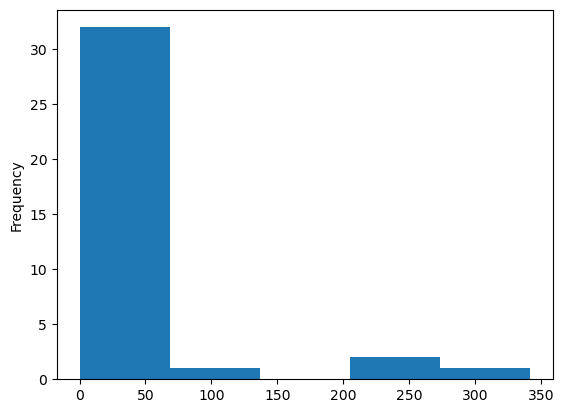

In [10]:
#add your code below
plt.figure()
elec_hist = ss['Electricity'].plot(kind='hist', bins=5);



**Q6.** Refer to the `ss` DataFrame.

Create a **scatter plot** of `Natural Gas` vs `Total`, to see the relationship between the two columns of `ss` DataFrame.

- Use the `.plot()` method on `ss` DataFrame
- Have `Natural Gas` on the `x-axis` and `Total` on the `y-axis`
- Assign the plot to the variable `gas_total`
- Ensure your code cell starts with `plt.figure()`

See below code syntax for some guidance:
```python
plt.figure() 
gas_total = DataFrame_Name.plot(x=..., y=..., kind='scatter');
```

<Figure size 640x480 with 0 Axes>

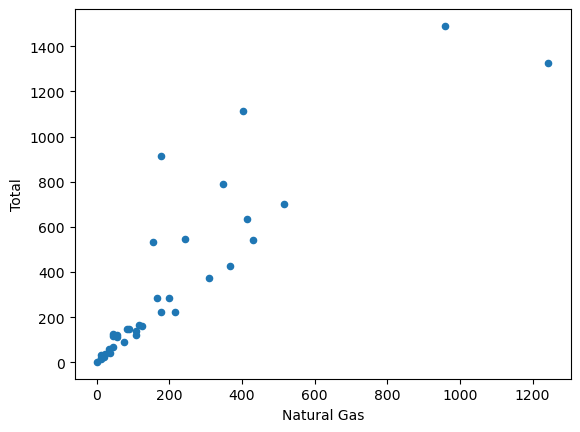

In [11]:
#add your code below
plt.figure()
gas_total = ss.plot(x= 'Natural Gas', y='Total', kind='scatter');



**Q7.** Refer to the `sector` DataFrame. 

Create a **vertical bar chart** of the `'sum'` column of the `sector` DataFrame using the `.plot()` method: `sector['sum']`

- Add a title of `'Energy consumption by sector'` to the plot
- Assign the plot to the variable `sector_sum`
- Ensure your code cell starts with `plt.figure()`

See below code syntax for some guidance:
```python
plt.figure()
sector_sum = DataFrame_Name.plot(kind='bar', title=...);
```

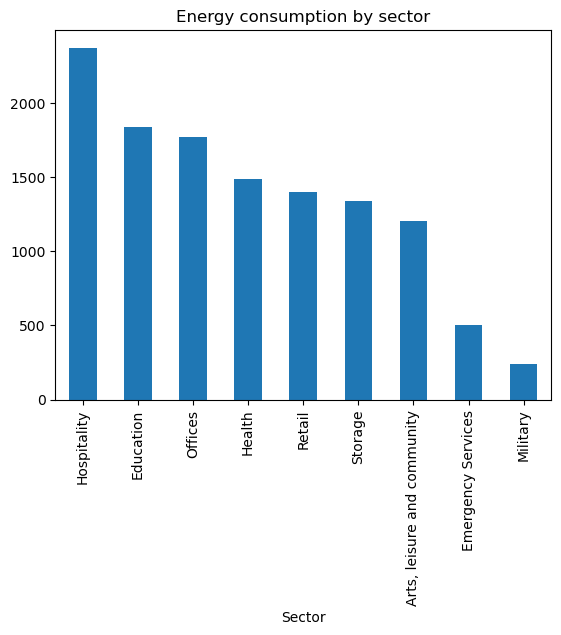

In [12]:
#add your code below
plt.figure()
sector_sum = sector['sum'].plot(kind='bar', title='Energy consumption by sector');




**Q8.** Refer to the given `new_df_use` DataFrame, which is identical to the `use` DataFrame but excludes the `Total` column (see below for the code).

Create a *horizontal* and *stacked* bar chart from the `new_df_use` DataFrame, using the `.plot()` method:

- Assign the plot to the variable `use_type`
- Give it a `figsize` of `(12,12)`
- You may find [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) useful
- Ensure your code cell starts with `plt.figure()`

See below code syntax for some guidance:
```python
plt.figure()
use_type = DataFrame_Name.plot.barh(stacked=True, figsize=(...));
```

<br/>

Run the following code cell to create the DataFrame `new_df_use`:

In [13]:
new_df_use = use.loc[:, ['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']]
new_df_use.head()

,Electricity,Natural Gas,Oil,District Heating,Other
Use,,,,,
Catering,758,587,800,0,0
Heating,762,6044,1602,265,0
Hot Water,160,801,257,17,109


<Figure size 640x480 with 0 Axes>

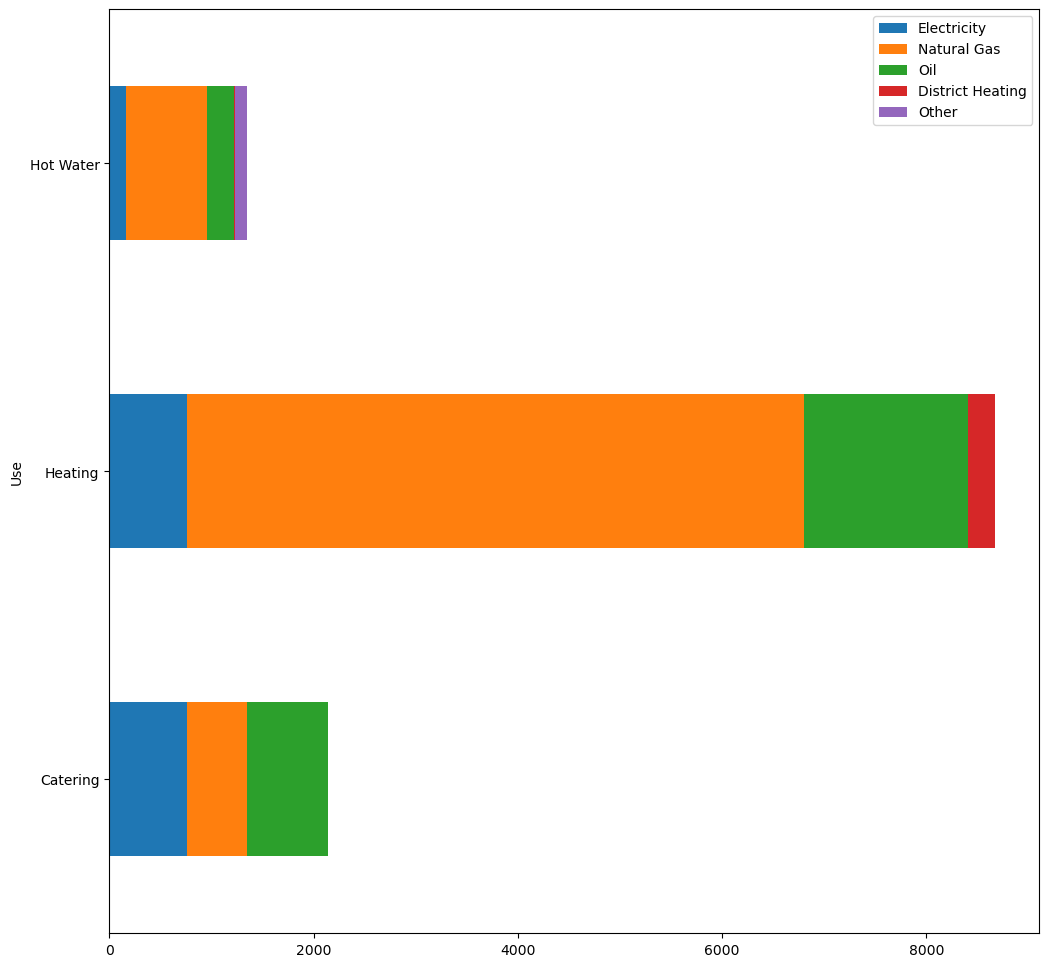

In [14]:
#add your code below
plt.figure()
use_type = new_df_use.plot.barh(stacked=True, figsize=(12,12));

